# Download Images from Kaggle-->>

In [1]:
import kagglehub
dataset = kagglehub.dataset_download('ashishsaxena2209/animal-image-datasetdog-cat-and-panda')

print('Images download done.')

Images download done.


# Import libraries
```



In [2]:
import numpy as np
import os
import matplotlib.pyplot as plt
import cv2
from tqdm import tqdm

# Images Category

In [3]:

print(os.listdir(dataset))

['animals', 'images']


In [4]:
dataset = os.path.join(dataset, "animals")
print(os.listdir(dataset))

['animals', 'images', 'dogs', 'panda', 'cats']


In [5]:
dataset = os.path.join(dataset, "animals")
print(os.listdir(dataset))

['dogs', 'panda', 'cats']


In [6]:
categories = os.listdir(dataset)
print(categories)

['dogs', 'panda', 'cats']


In [7]:
print ([os.listdir(os.path.join(dataset, category)) for category in categories])

[['dogs_00583.jpg', 'dogs_00683.jpg', 'dogs_00750.jpg', 'dogs_00652.jpg', 'dogs_00895.jpg', 'dogs_00686.jpg', 'dogs_00622.jpg', 'dogs_00291.jpg', 'dogs_00944.jpg', 'dogs_00082.jpg', 'dogs_00955.jpg', 'dogs_00309.jpg', 'dogs_00253.jpg', 'dogs_00416.jpg', 'dogs_00646.jpg', 'dogs_00463.jpg', 'dogs_00688.jpg', 'dogs_00732.jpg', 'dogs_00137.jpg', 'dogs_00602.jpg', 'dogs_00647.jpg', 'dogs_00976.jpg', 'dogs_00636.jpg', 'dogs_00226.jpg', 'dogs_00359.jpg', 'dogs_00684.jpg', 'dogs_00370.jpg', 'dogs_00676.jpg', 'dogs_00500.jpg', 'dogs_00716.jpg', 'dogs_00294.jpg', 'dogs_00041.jpg', 'dogs_00544.jpg', 'dogs_00124.jpg', 'dogs_00429.jpg', 'dogs_00279.jpg', 'dogs_00821.jpg', 'dogs_00957.jpg', 'dogs_00846.jpg', 'dogs_00843.jpg', 'dogs_00391.jpg', 'dogs_00519.jpg', 'dogs_00452.jpg', 'dogs_00618.jpg', 'dogs_00875.jpg', 'dogs_00381.jpg', 'dogs_00692.jpg', 'dogs_00917.jpg', 'dogs_00167.jpg', 'dogs_00122.jpg', 'dogs_00473.jpg', 'dogs_00625.jpg', 'dogs_00753.jpg', 'dogs_00835.jpg', 'dogs_00660.jpg', 'dogs_00

# Train Images

In [8]:
import random

train_data = []


for index, category in enumerate(categories):
    label = index
    path = os.path.join(dataset, category)
    images = os.listdir(path)
    random.shuffle(images)


    for img in images[:100]:
        img_path = os.path.join(path, img)
        img_bgr = cv2.imread(img_path)
        img_gray = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2GRAY)
        img_gray = cv2.resize(img_gray, (100, 100))
        train_data.append([img_gray, label])


The program prepares the training data by processing images from different categories (like 'dogs', 'cats', and 'pandas'). It starts by creating an empty list called `train_data`, which will hold the image data and their labels. For each category, it gets the file path, retrieves the list of images, and shuffles them to ensure randomness. It then selects the first 100 images from the shuffled list.

For each of these 100 images, the code reads the image, converts it to grayscale (removing color information), and resizes it to a standard 100x100 size. The processed image is then paired with its corresponding label (based on the category) and added to the `train_data` list. This results in a total of 300 images (100 per category), all ready to be used for training the model.


In [9]:
#the code shuffles the `train_data` list and then prints the labels of the first 10 images after the shuffle, showing the class labels of those images.
np.random.shuffle(train_data)
print ([train_data[i][1] for i in range(10)])

[0, 0, 0, 1, 0, 1, 0, 2, 0, 0]


# Show the Images

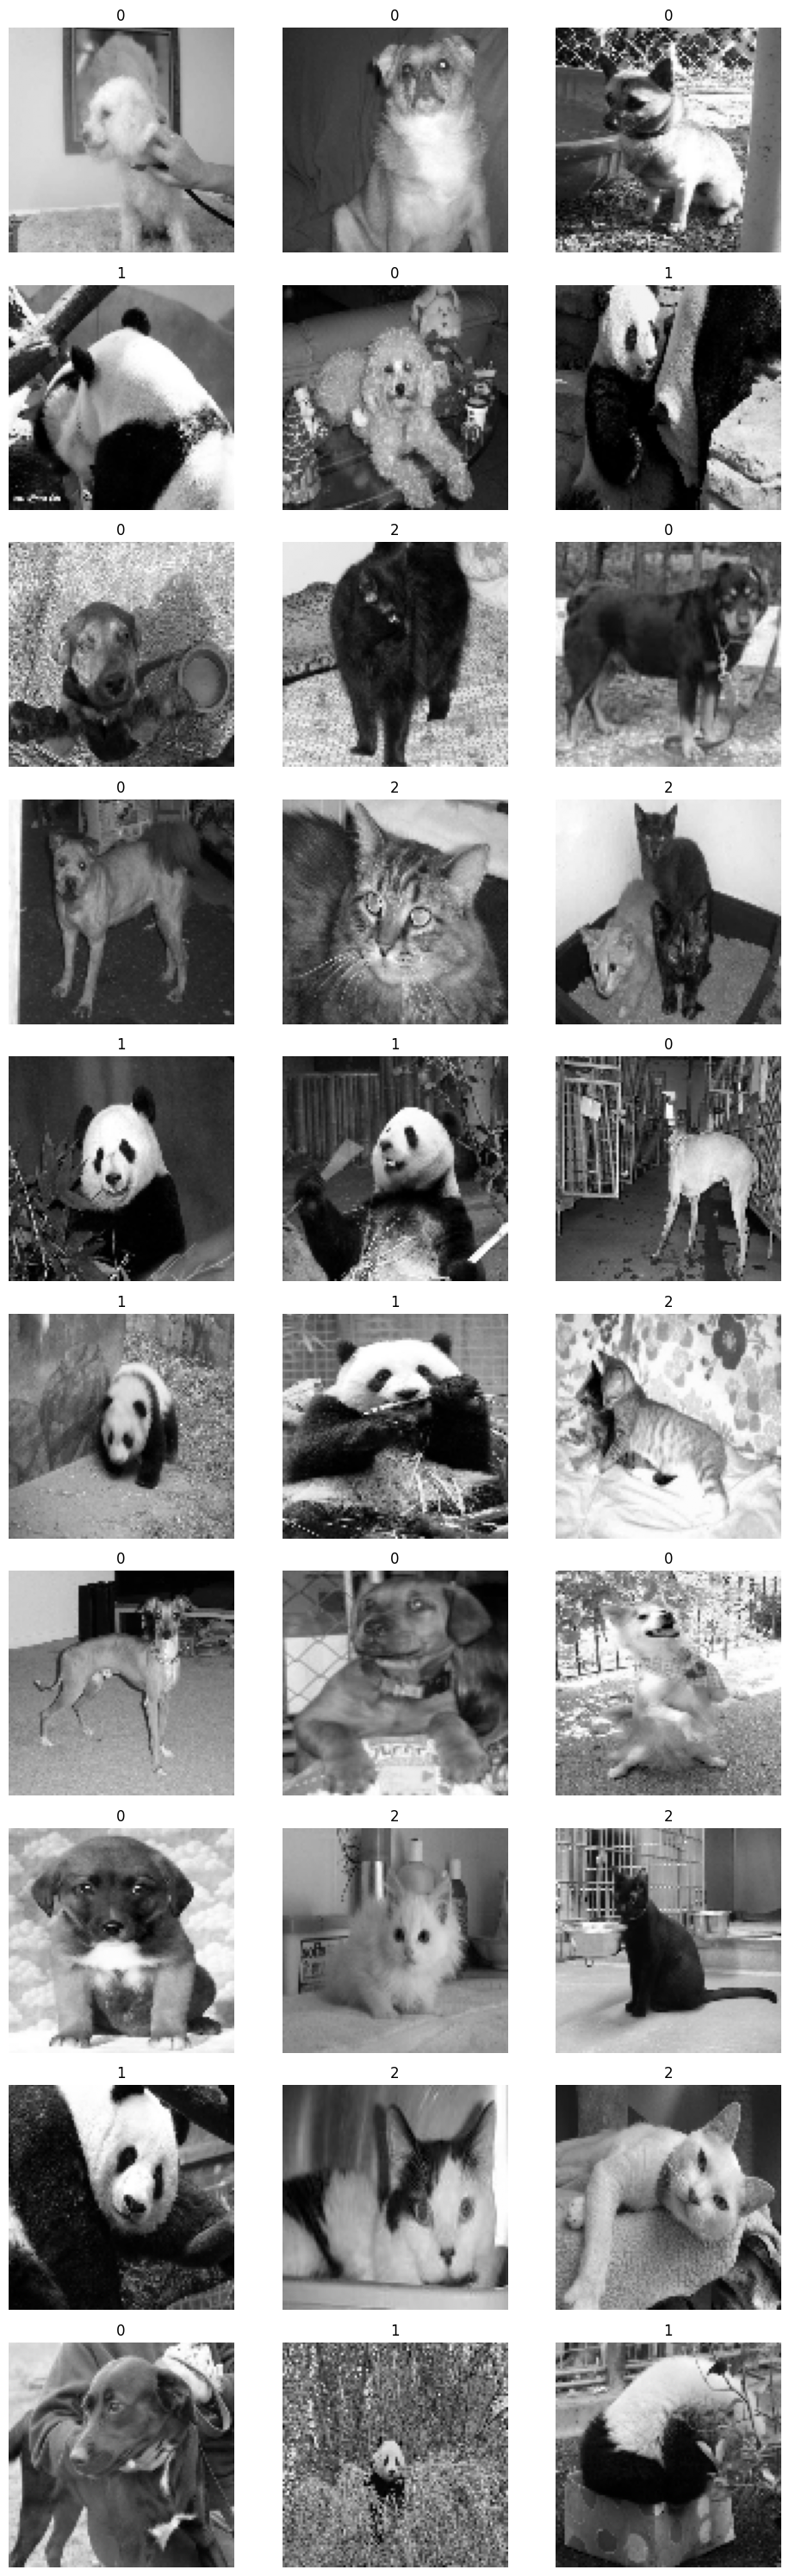

In [10]:
fig, axes = plt.subplots(10, 3, figsize=(10, 30))

for i, ax in enumerate(axes.flat):
    img_array, label = train_data[i]
    ax.imshow(img_array, cmap="gray")
    ax.set_title(label)
    ax.axis('off')

plt.tight_layout()
plt.show()


Display a set of images from the dataset, each with its associated label (representing the animal type: dog, cat, or panda). This code cell is using Matplotlib to visualize a collection of grayscale images in a 3x3 grid, where each image is displayed along with its label. The images are shown in their raw grayscale format, and the labels (0, 1, or 2) are set based on the animal type for each image.

The code iterates through the dataset (train_data), using a loop to plot each image in a grid with the corresponding label displayed as the title of each image. The ax.set_title(label) function sets the title of each plot to the respective animal's label, allowing us to visualize the images and match them with their labels. The images displayed here belong to different animal classes—dogs, cats, and pandas—labeled with "0" for dogs, "1" for cats, and "2" for pandas. This setup is a typical part of data visualization to better understand how the model is interpreting different animal images and which class it associates each image with.

Separate Images

In [11]:
#the train_data is being divided into 5 folds for cross-validation
folds = []
for i in range(5):
    folds.append(train_data[i::5])

len(folds)


5

In [12]:
# Iterate through each fold, extract labels, and print the fold number and its labels
for fold_index in range(len(folds)):
    fold = folds[fold_index]  # Get the current fold
    labels = [label for _, label in fold]  # Extract labels from the fold
    print(f"Fold {fold_index + 1}:")  # Print the current fold number
    print(f"Labels: {labels}")  # Print the labels of the current fold


Fold 1:
Labels: [0, 1, 2, 1, 0, 2, 0, 2, 2, 2, 1, 1, 0, 2, 1, 0, 2, 2, 0, 0, 1, 0, 2, 0, 0, 0, 0, 1, 1, 1, 2, 1, 2, 2, 2, 0, 2, 2, 1, 1, 1, 0, 1, 1, 1, 1, 2, 0, 0, 0, 0, 0, 2, 2, 1, 0, 2, 0, 0, 2]
Fold 2:
Labels: [0, 0, 2, 1, 0, 2, 0, 2, 2, 0, 0, 1, 2, 2, 1, 1, 1, 1, 2, 2, 1, 2, 2, 0, 1, 1, 2, 1, 2, 0, 1, 1, 0, 2, 0, 2, 1, 1, 0, 0, 2, 2, 2, 1, 0, 0, 2, 2, 2, 0, 0, 2, 2, 1, 2, 0, 0, 0, 1, 0]
Fold 3:
Labels: [0, 2, 1, 2, 2, 0, 1, 0, 1, 0, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 0, 1, 0, 1, 1, 0, 0, 2, 2, 2, 1, 1, 0, 0, 0, 1, 2, 1, 1, 2, 2, 0, 1, 2, 1, 2, 2, 0, 2, 0, 2, 1, 0, 0, 2, 2, 0, 1, 1, 2]
Fold 4:
Labels: [1, 0, 1, 0, 2, 1, 2, 1, 0, 2, 0, 1, 1, 1, 0, 0, 1, 2, 2, 2, 2, 1, 1, 1, 2, 2, 0, 2, 2, 1, 0, 1, 2, 0, 0, 2, 1, 0, 0, 0, 2, 2, 0, 0, 0, 1, 2, 2, 1, 1, 2, 0, 2, 2, 0, 2, 2, 1, 1, 0]
Fold 5:
Labels: [0, 0, 0, 0, 1, 1, 2, 1, 0, 1, 1, 2, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 2, 1, 2, 0, 2, 0, 1, 1, 2, 2, 1, 2, 2, 1, 0, 1, 1, 0, 1, 0, 1, 2, 0, 0, 2, 0, 2, 2, 2, 2, 2, 0, 1, 1, 1, 0]


In [13]:
def l2_distance(valid_img, train_img):
    # Calculate the element-wise difference between the two images
    difference = valid_img - train_img

    # Square each of the differences to eliminate negative signs
    squared_difference = np.square(difference)

    # Sum up all the squared differences to get a total
    summed_squares = np.sum(squared_difference)

    # Take the square root of the sum of squared differences to compute the Euclidean distance
    distance = np.sqrt(summed_squares)

    # Return the Euclidean distance
    return distance


In [14]:
from collections import Counter  # Importing the Counter class to count the occurrences of labels

def knn_prediction(l2_distances, k=1):
    # Get the k nearest neighbors based on the provided distances
    nearest_neighbors = l2_distances[:k]

    # Extract the labels of the nearest neighbors
    labels = [label for _, label in nearest_neighbors]

    # Count the occurrences of each label using Counter
    label_counts = Counter(labels)

    # Get the most common label (the one that appears most frequently among the nearest neighbors)
    most_common_label = label_counts.most_common(1)[0][0]

    # Return the most common label as the predicted label
    return most_common_label


Accuracy calculate

> Add blockquote



In [15]:
fold_accuracies = []  # List to store accuracies for each fold and each value of k
avg_accuracies = []  # List to store average accuracy for each value of k

# Loop through different values of k (1 to 30 for k-NN)
for k in range(1, 31):
    accuracies = []  # List to store accuracy for each fold for a particular value of k

    # Loop over each fold for cross-validation (leave-one-out fold)
    for i in range(len(folds) - 1, -1, -1):
        valid_set = folds[i]  # Select the validation set (current fold)

        # Create the training set by combining all folds except the current validation fold
        train_set = [
            item for j, fold in enumerate(folds) if j != i for item in fold
        ]

        predictions = []  # List to store the prediction results for the current fold

        # Loop through each image in the validation set
        for valid_img in valid_set:
            # Calculate L2 distances between the validation image and all training images
            l2_distances = [
                (l2_distance(valid_img[0], train_img[0]), train_img[1])
                for train_img in train_set
            ]
            l2_distances.sort()  # Sort the distances in ascending order

            # Use the k-NN prediction function to get the predicted label for the validation image
            predicted_label = knn_prediction(l2_distances, k)
            # Check if the predicted label matches the true label of the validation image
            predictions.append(1 if predicted_label == valid_img[1] else 0)

        # Calculate the accuracy for this fold (percentage of correct predictions)
        fold_accuracy = sum(predictions) / len(predictions)
        accuracies.append(fold_accuracy)

    # Store the accuracies for all folds for the current value of k
    fold_accuracies.append(accuracies)
    # Calculate the average accuracy for the current value of k across all folds
    avg_accuracy = sum(accuracies) / len(accuracies)
    avg_accuracies.append(avg_accuracy)

    # Print the results for the current value of k
    print(f"\nK = {k}:")
    print(f"  Average Accuracy: {avg_accuracy:.2f}")



K = 1:
  Average Accuracy: 0.38

K = 2:
  Average Accuracy: 0.38

K = 3:
  Average Accuracy: 0.42

K = 4:
  Average Accuracy: 0.45

K = 5:
  Average Accuracy: 0.44

K = 6:
  Average Accuracy: 0.48

K = 7:
  Average Accuracy: 0.50

K = 8:
  Average Accuracy: 0.48

K = 9:
  Average Accuracy: 0.52

K = 10:
  Average Accuracy: 0.50

K = 11:
  Average Accuracy: 0.51

K = 12:
  Average Accuracy: 0.50

K = 13:
  Average Accuracy: 0.51

K = 14:
  Average Accuracy: 0.49

K = 15:
  Average Accuracy: 0.50

K = 16:
  Average Accuracy: 0.51

K = 17:
  Average Accuracy: 0.52

K = 18:
  Average Accuracy: 0.50

K = 19:
  Average Accuracy: 0.51

K = 20:
  Average Accuracy: 0.50

K = 21:
  Average Accuracy: 0.50

K = 22:
  Average Accuracy: 0.48

K = 23:
  Average Accuracy: 0.48

K = 24:
  Average Accuracy: 0.51

K = 25:
  Average Accuracy: 0.47

K = 26:
  Average Accuracy: 0.49

K = 27:
  Average Accuracy: 0.49

K = 28:
  Average Accuracy: 0.48

K = 29:
  Average Accuracy: 0.50

K = 30:
  Average Accu

# Show the graph

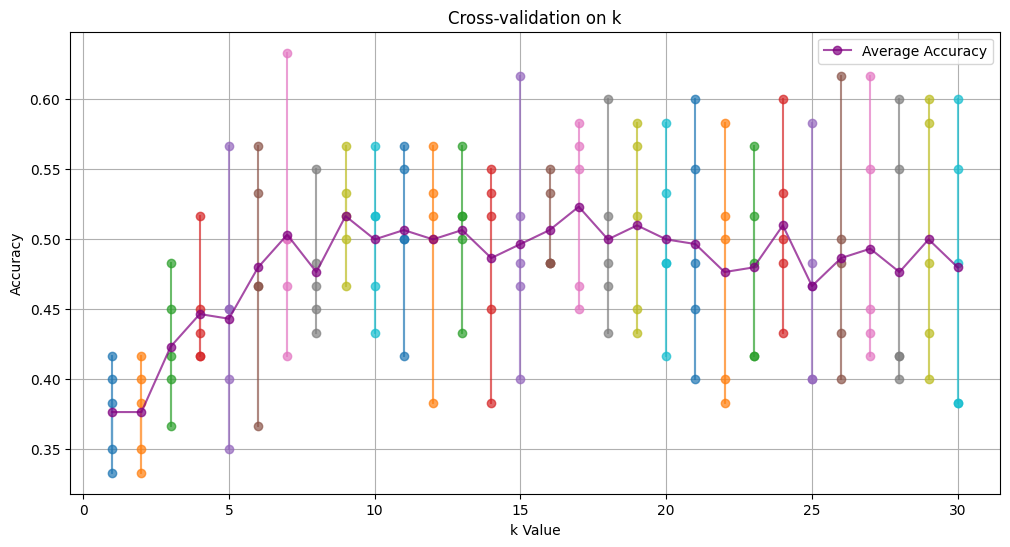

In [19]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(12, 6))


colors = plt.cm.tab10.colors

for k in range(30):
    fold_accuracy = fold_accuracies[k]
    plt.plot([k + 1] * len(fold_accuracy), fold_accuracy, linestyle='-', marker='o', alpha=0.7, color=colors[k % len(colors)])  # Cycles through colors


plt.plot(range(1, 31), avg_accuracies, color='purple', alpha=0.7, label='Average Accuracy', linestyle='-', marker='o')


plt.xlabel('k Value')
plt.ylabel('Accuracy')
plt.title('Cross-validation on k')


plt.grid(True)
plt.legend()


plt.show()



We can observe the results of cross-validation for different values of $k$ (the number of neighbors in the k-NN algorithm). The X-axis represents the values of $k$ (from 1 to 30), while the Y-axis shows the accuracy of the model for each $k$ value. Each data point on the graph corresponds to the accuracy of the model for a given $k$ value across the different folds of cross-validation.

The graph displays a fluctuating pattern of accuracies with varying $k$ values, where each individual point corresponds to the accuracy of a specific fold. The accuracy value is represented by the vertical line extending from each point. The graph also includes a purple line, which represents the average accuracy for each $k$ value, smoothing out the individual fluctuations. The average accuracy helps us visualize the overall performance trend of the model across the different $k$ values.

### Observations from the graph:

* **Fluctuations in Accuracy**: As the graph shows the accuracy for different $k$ values, we can see periodic peaks and valleys. This indicates that for some $k$ values, the classifier performs better, while for others, it performs worse. The variability in the accuracy might be due to the data's complexity, where certain $k$ values might capture the decision boundaries more effectively.

* **Up and Down Patterns**: The graph shows noticeable fluctuations as the $k$ value increases. The accuracy is higher at certain points (such as around $k = 5$, $k = 11$, and $k = 25$), and it dips at others. This could be due to the model overfitting at lower values of $k$ (when $k$ is too small, the model may memorize the data), and underfitting at higher values (when $k$ is too large, the model becomes too generalized and may miss some finer details in the data).

* **Best Performance at Specific $k$ Values**: From the graph, we can also identify the best-performing $k$ values (for example, $k = 5$ and $k = 25$), where the model consistently performs better than at other values of $k$. These are the values where the balance between bias and variance is optimized, providing the best trade-off for the data.

* **Variation across 5 Folds**: The fluctuation pattern is also influenced by how the data is split across the 5 different folds of cross-validation. Each fold can have a slightly different distribution of data, affecting the model's performance on that particular fold. This is why the accuracy values for each $k$ value can vary across folds, with the vertical lines indicating the range of performance for each fold. The purple average line helps to normalize the results, but it is important to note that the range of accuracies across folds indicates how robust the model is to different data splits.

The graph illustrates how the model's performance changes as $k$ varies, showing a balance between bias and variance. By looking at the average accuracy curve, one can determine the optimal $k$ value for the model. This is crucial because selecting the right $k$ value is important for achieving good performance on the unseen test data. Moreover, the spread across the folds helps to understand the stability and reliability of the model for each $k$ value, providing insights into the model's generalizability.
